# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Load social network ads datasets into a panda dataframe

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Summary of dataset

In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Pre-processing data

In [7]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [8]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### No null values

### Heatmap showing the correlation coefficients between all pairs of features in the dataset.

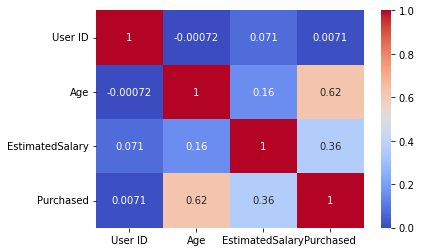

In [3]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

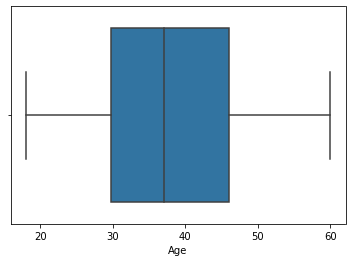

In [11]:
sns.boxplot(df['Age']);

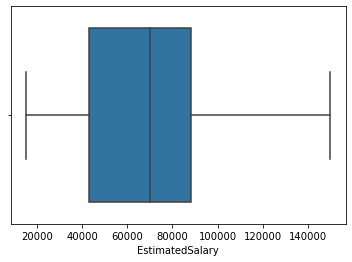

In [12]:
sns.boxplot(df['EstimatedSalary']);

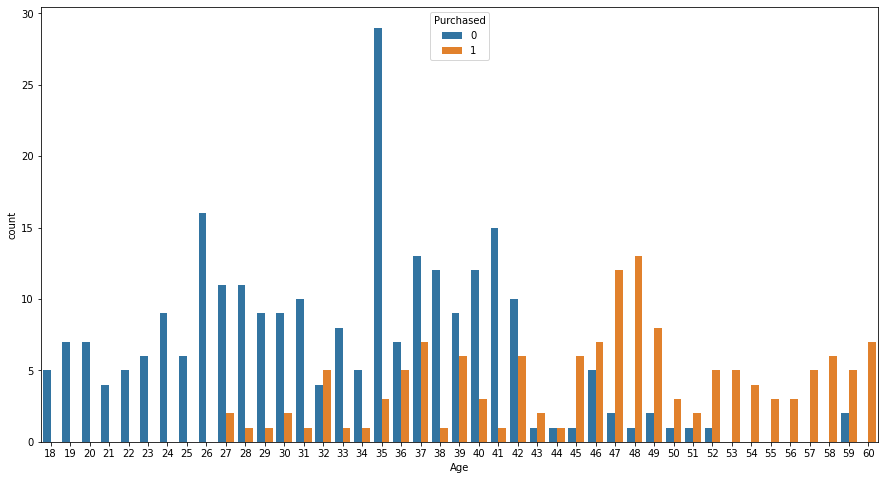

In [13]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Age', hue = 'Purchased', data = df)
plt.show()

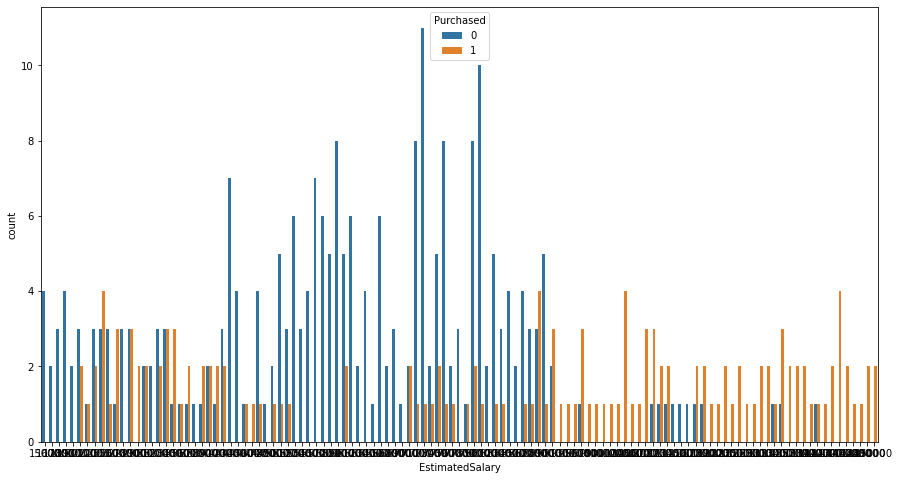

In [14]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'EstimatedSalary', hue = 'Purchased', data = df)
plt.show()

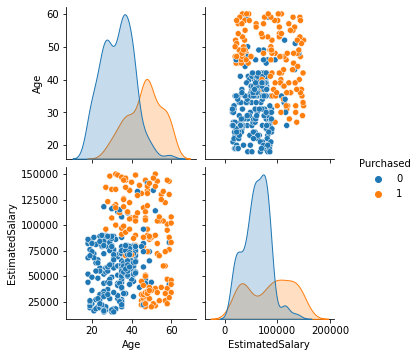

In [15]:
sns.pairplot(df, hue = 'Purchased');

In [16]:
X = df.drop(['Purchased'], axis = 1)
Y = df['Purchased'] 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [20]:
Y_pred = classifier.predict(X_test)

In [21]:
print(accuracy_score(Y_test, Y_pred) * 100)

93.75


In [22]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [24]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[50  2]
 [ 3 25]]


The resulting confusion matrix tells us that there are 50 + 25 = 75 correct predictions and 2 + 3 = 5 incorrect predictions 